# Import Libraries

In [45]:
!pip install catboost -q
!pip install shap -q

     |████████████████████████████████| 564 kB 5.4 MB/s 


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import shap

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score 

import warnings
warnings.filterwarnings('ignore')

# Read and Explore the Dataset

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/phillipstanley/Insurance-Claim-Prediction/main/insurance2.csv')

In [4]:
df.sample(5, random_state = 0)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
578,52,1,30.200,1,0,3,9724.53000,1
610,47,0,29.370,1,0,2,8547.69130,0
569,48,1,40.565,2,1,1,45702.02235,1
1034,61,1,38.380,0,0,1,12950.07120,1
198,51,0,18.050,0,0,1,9644.25250,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [6]:
# divide the feature into numerical and categorical features
nums = ['age', 'bmi', 'children', 'charges']
cats = ['sex', 'smoker', 'region', 'insuranceclaim']

In [7]:
df[nums].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df[cats].astype('object').describe()

,sex,smoker,region,insuranceclaim
count,1338,1338,1338,1338
unique,2,2,4,2
top,1,0,2,1
freq,676,1064,364,783


In [9]:
for cat in cats:
  print(df[cat].value_counts())
  print()

1    676
0    662
Name: sex, dtype: int64

0    1064
1     274
Name: smoker, dtype: int64

2    364
3    325
1    325
0    324
Name: region, dtype: int64

1    783
0    555
Name: insuranceclaim, dtype: int64



# Univariate Analysis

## Numerical

### Box Plots

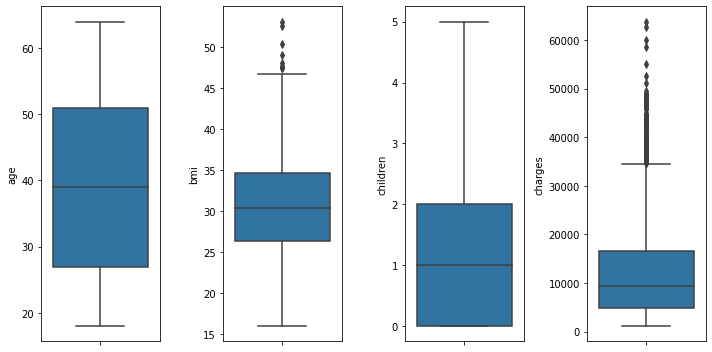

In [10]:
plt.figure(figsize = (10, 5))
for i in range(0, len(nums)):
  plt.subplot(1, 4, i + 1)
  sns.boxplot(y = df[nums[i]])
  plt.tight_layout()

### Dist Plots

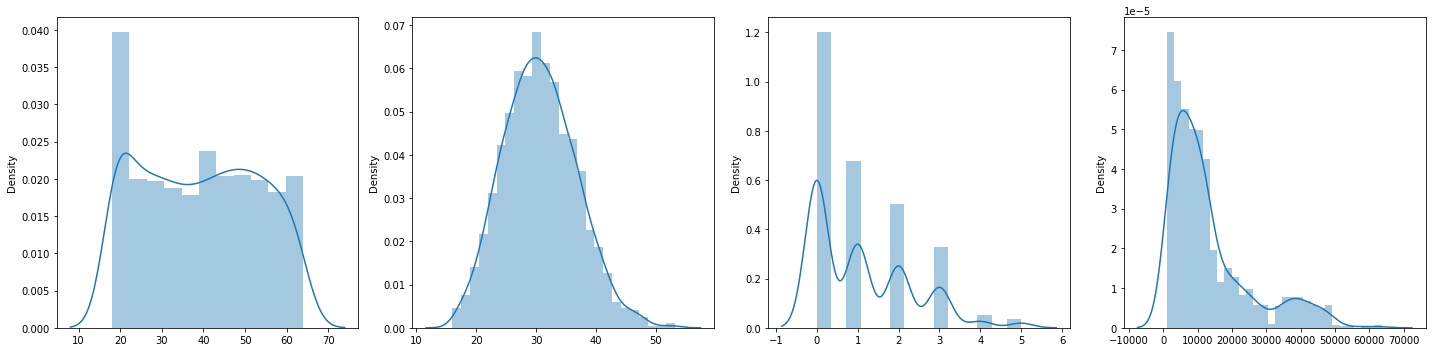

In [11]:
plt.figure(figsize = (20, 5))
for i in range(0, len(nums)):
  plt.subplot(1, 4, i + 1)
  sns.distplot(x = df[nums[i]])
  plt.tight_layout()

### Violin Plots

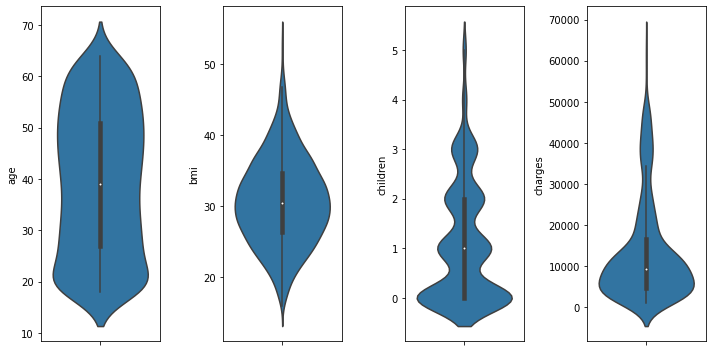

In [12]:
plt.figure(figsize = (10, 5))
for i in range(0, len(nums)):
  plt.subplot(1, 4, i + 1)
  sns.violinplot(y = df[nums[i]])
  plt.tight_layout()

## Categorical

### Count Plots

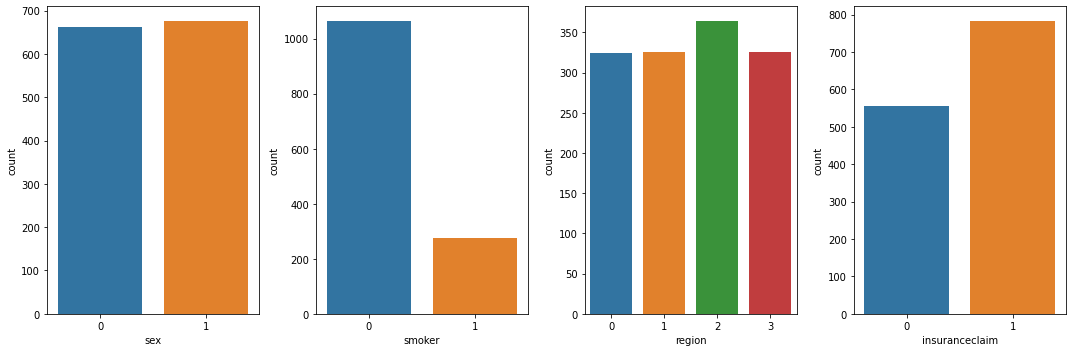

In [13]:
plt.figure(figsize = (15, 5))
for i in range(0, len(cats)):
  plt.subplot(1, 4, i + 1)
  sns.countplot(df[cats[i]])
  plt.tight_layout()

# Bivariate Analysis

## Correlation

In [14]:
spearman = df.corr('spearman')
pearson = df.corr('pearson')

### Spearman

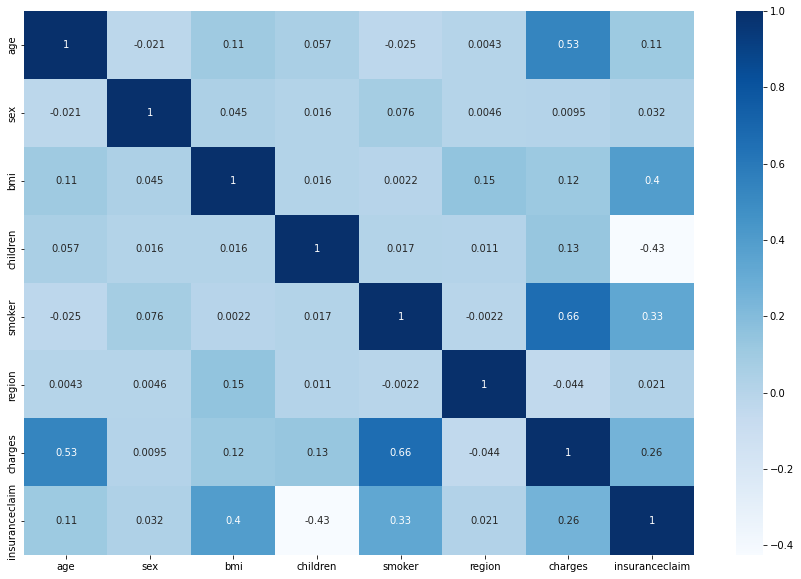

In [15]:
plt.figure(figsize = (15, 10))
sns.heatmap(spearman, annot = True, cmap = 'Blues');

### Pearson

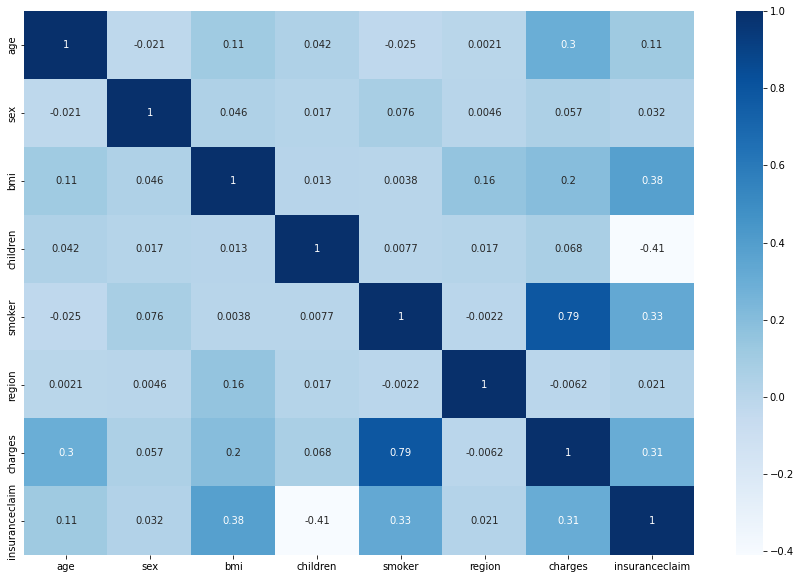

In [16]:
plt.figure(figsize = (15, 10))
sns.heatmap(pearson, annot = True, cmap = 'Blues');

## Pair Plots

<Figure size 1080x1080 with 0 Axes>

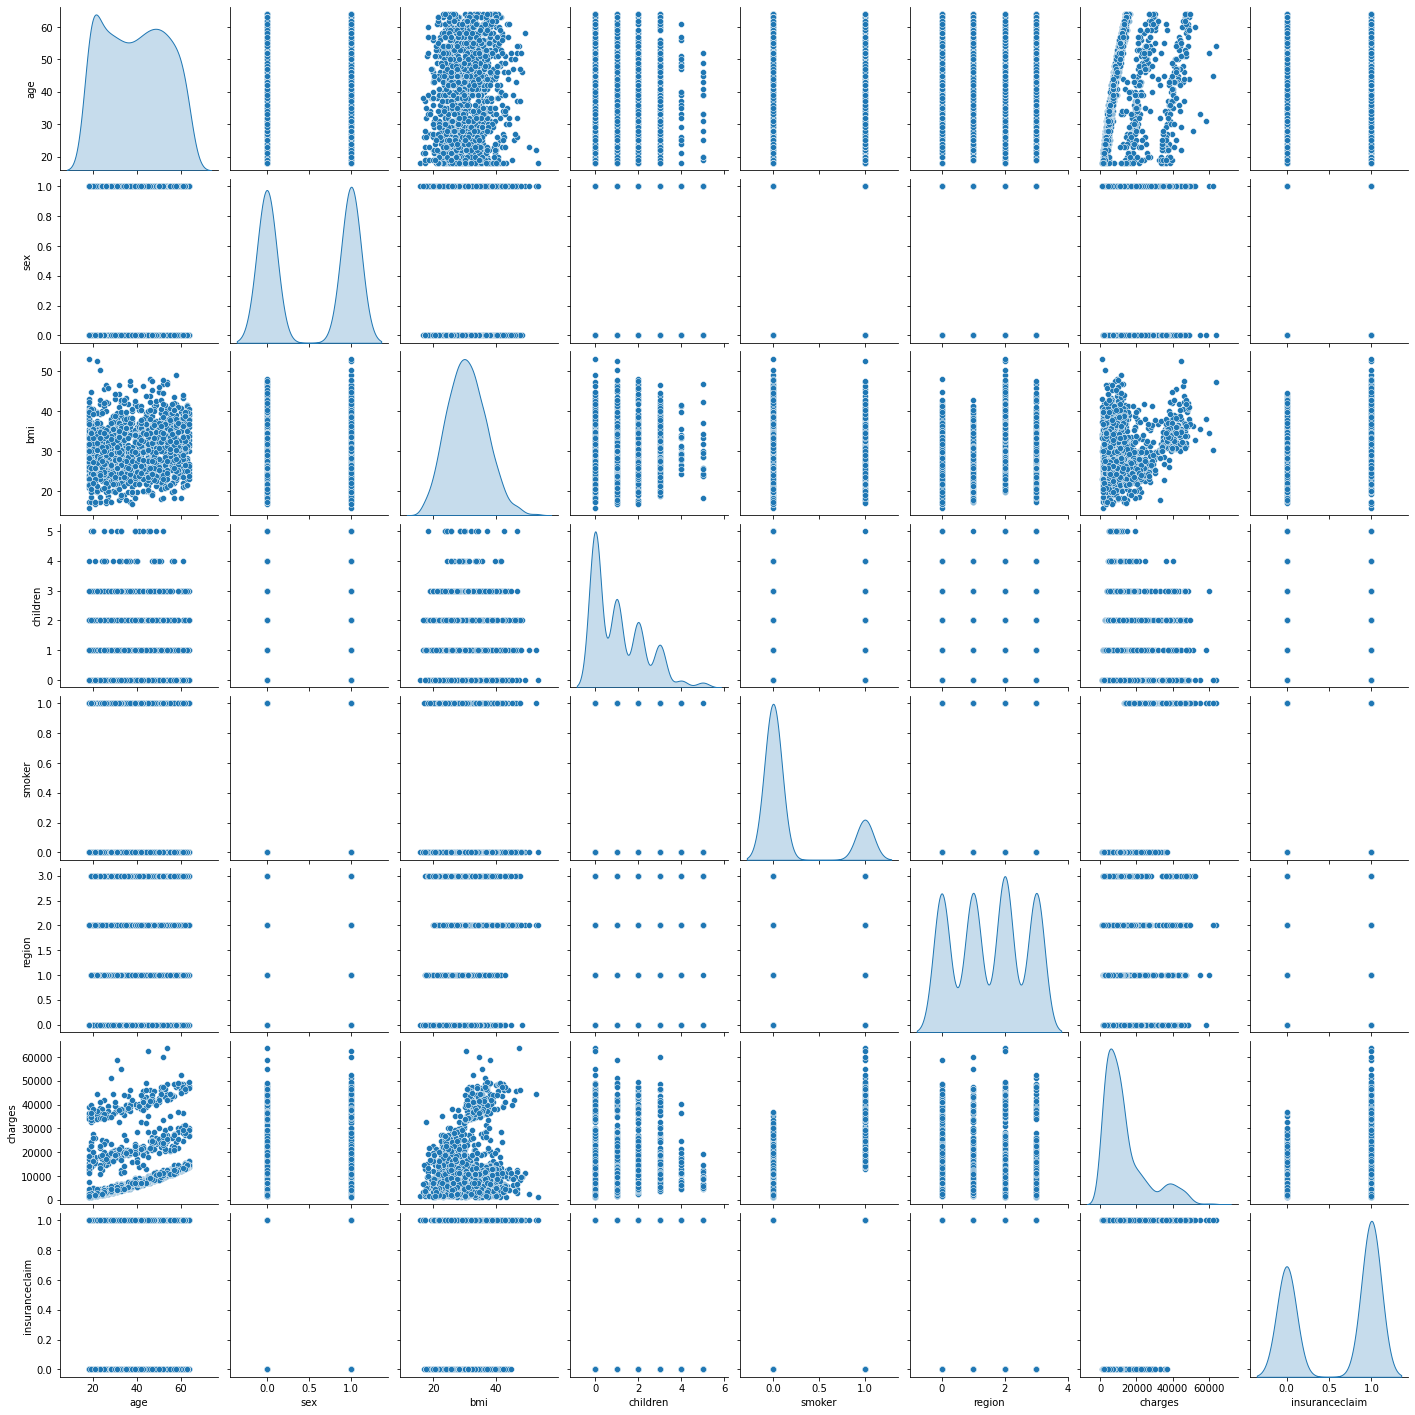

In [17]:
plt.figure(figsize = (15, 15))
sns.pairplot(df, diag_kind = 'kde');

## Category Plots

### Sex

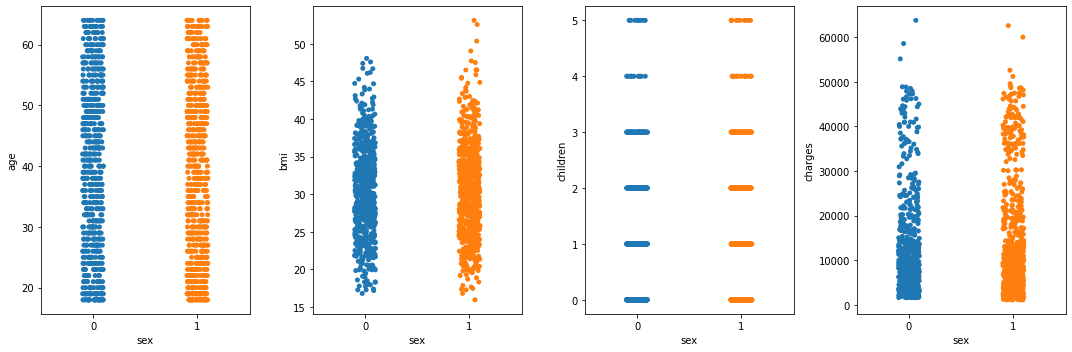

In [18]:
fig = plt.figure(figsize=(15, 5))
for i in range(0, len(nums)):
   ax = fig.add_subplot(1, 4, i + 1)
   sns.stripplot(ax = ax, data = df, x = 'sex', y = nums[i])
   plt.tight_layout()

### Smoker

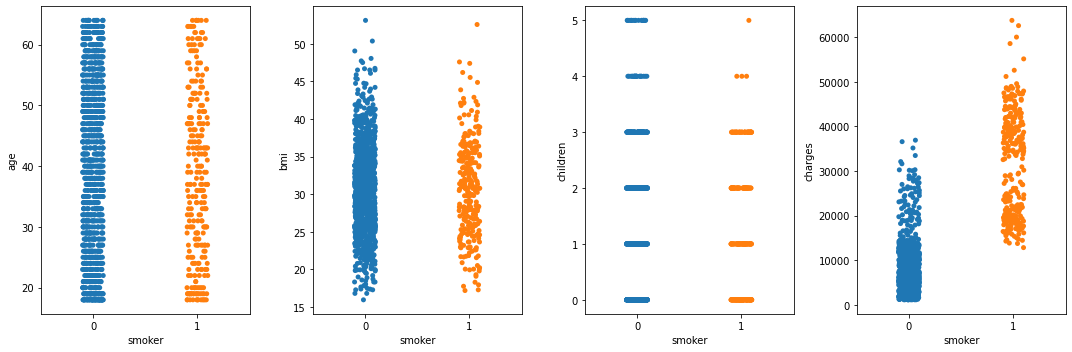

In [19]:
fig = plt.figure(figsize=(15, 5))
for i in range(0, len(nums)):
   ax = fig.add_subplot(1, 4, i + 1)
   sns.stripplot(ax = ax, data = df, x = 'smoker', y = nums[i])
   plt.tight_layout()

### Region

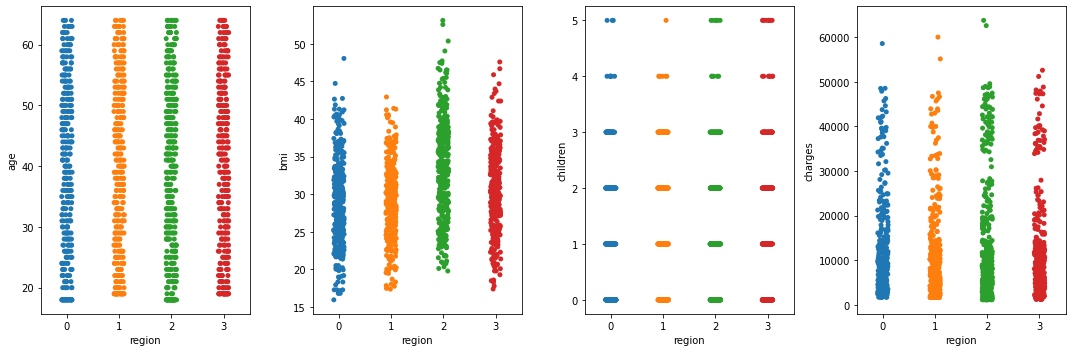

In [20]:
fig = plt.figure(figsize=(15, 5))
for i in range(0, len(nums)):
   ax = fig.add_subplot(1, 4, i + 1)
   sns.stripplot(ax = ax, data = df, x = 'region', y = nums[i])
   plt.tight_layout()

### Insurance Claim

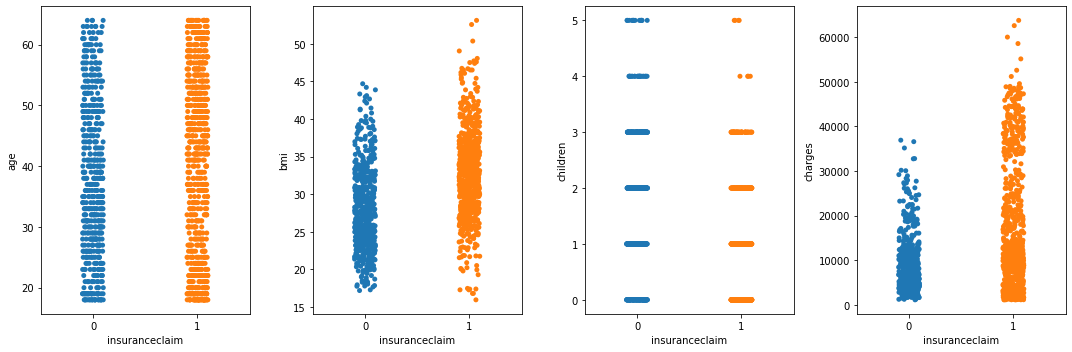

In [21]:
fig = plt.figure(figsize=(15, 5))
for i in range(0, len(nums)):
   ax = fig.add_subplot(1, 4, i + 1)
   sns.stripplot(ax = ax, data = df, x = 'insuranceclaim', y = nums[i])
   plt.tight_layout()

# Data Preprocessing

In [22]:
df_clean = df.copy()

## Missing Values

In [23]:
df_clean.isna().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

## Duplicated Values

In [24]:
df_clean.duplicated().sum()

1

In [25]:
df_clean.drop_duplicates(inplace = True)
print(df_clean.duplicated().sum())

0


In [26]:
df_clean.duplicated(subset = ['age', 'bmi', 'children', 'charges', 'sex', 'smoker', 'region']).sum()

0

## Outliers

### Z-Score

In [27]:
print(f'before: {len(df_clean)}')

filtered_entries = np.array([True] * len(df_clean))

for num in nums:
    zscore = abs(stats.zscore(df_clean[num])) 
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_clean = df_clean[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'after: {len(df_clean)}')

before: 1337
after: 1308


### IQR

In [28]:
print(f'before: {len(df_clean)}')

filtered_entries = np.array([True] * len(df_clean))
for num in nums:
    Q1 = df_clean[num].quantile(0.25)
    Q3 = df_clean[num].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_clean[num] >= low_limit) & (df_clean[num] <= high_limit)) & filtered_entries
    
df_clean = df_clean[filtered_entries]

print(f'after: {len(df_clean)}')

before: 1308
after: 1172


## Standardization and Normalization

In [29]:
# 'bmi' is the only feature that has a distribution close to normal

for col in ['age', 'children', 'charges']:
  df_clean[col] = MinMaxScaler().fit_transform(df_clean[col].values.reshape(len(df_clean), 1))

df_clean['bmi'] = StandardScaler().fit_transform(df_clean['bmi'].values.reshape(len(df_clean), 1))

## One-hot Encoding

In [30]:
temp = cats
temp.remove('insuranceclaim')
df_clean[temp] = df_clean[temp].astype('object')

In [31]:
df_clean = pd.get_dummies(df_clean)
df_clean.dtypes

age               float64
bmi               float64
children          float64
charges           float64
insuranceclaim      int64
sex_0               uint8
sex_1               uint8
smoker_0            uint8
smoker_1            uint8
region_0            uint8
region_1            uint8
region_2            uint8
region_3            uint8
dtype: object

In [32]:
df_clean

,age,bmi,children,charges,insuranceclaim,sex_0,sex_1,smoker_0,smoker_1,region_0,region_1,region_2,region_3
0,0.021739,-0.358673,0.00,0.475058,1,1,0,0,1,0,0,0,1
1,0.000000,0.644329,0.25,0.018193,1,0,1,1,0,0,0,1,0
2,0.217391,0.512759,0.75,0.100285,0,0,1,1,0,0,0,1,0
3,0.326087,-1.246337,0.00,0.628746,0,0,1,1,0,0,1,0,0
4,0.304348,-0.191221,0.00,0.082727,1,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.165895,0.75,0.285663,0,0,1,1,0,0,1,0,0
1334,0.000000,0.328221,0.00,0.032672,1,1,0,1,0,1,0,0,0
1335,0.000000,1.170605,0.00,0.015309,1,1,0,1,0,0,0,1,0
1336,0.065217,-0.717498,0.00,0.026704,0,1,0,1,0,0,0,0,1


## Split Train and Test Dataset

In [33]:
X = df_clean.drop(columns = ['insuranceclaim']) 
y = df_clean['insuranceclaim']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(820, 12)
(820,)
(352, 12)
(352,)


# Modelling

In [36]:
models = {
    "Logistic Regression" : LogisticRegression(random_state = 0),
    "LDA" : LinearDiscriminantAnalysis(),
    "KNN" : KNeighborsClassifier(n_neighbors=3), 
    "Gaussian": GaussianNB(),
    "SVC" : SVC(random_state = 0),           
    "Decision Tree": DecisionTreeClassifier(random_state = 0),
    "SGD" : SGDClassifier(random_state = 0),    
    "Random Forest" : RandomForestClassifier(random_state = 0),   
    "Gradient Boosting" : GradientBoostingClassifier(random_state = 0),
    "Adaboost" : AdaBoostClassifier(random_state = 0),
    "XGBoost" : XGBClassifier(random_state = 0),
    "CatBoost" : CatBoostClassifier(random_state = 0, ),
    "LGBM" : LGBMClassifier(random_state = 0),
        }

In [37]:
rs = pd.DataFrame({
    'Model': [ ],
    'Recall': [ ], 
    'Precision': [ ], 
    'ROC_AUC': [ ], 
    'F1': [ ], 
    'Accuracy': [ ]})
for model in models:
      models[model].fit(X_train, y_train)
      y_pred = models[model].predict(X_test)

      method = model
      accuracy = accuracy_score(y_test, y_pred)
      recall = recall_score(y_test, y_pred)
      f1 = f1_score(y_test, y_pred)
      precision =  precision_score(y_test, y_pred)
      roc_auc = roc_auc_score(y_test, y_pred)

      rs = rs.append({'Model': method,
                      'Recall': recall,
                      'Precision': precision,
                      'ROC_AUC': roc_auc,
                      'F1': f1,
                      'Accuracy': accuracy}, ignore_index = True)

rs.sort_values(['Recall'], ascending = False).reset_index().drop('index', axis = 1)

Learning rate set to 0.009465
0:	learn: 0.6808281	total: 48.2ms	remaining: 48.1s
1:	learn: 0.6693586	total: 49.3ms	remaining: 24.6s
2:	learn: 0.6579192	total: 50.2ms	remaining: 16.7s
3:	learn: 0.6474587	total: 51.6ms	remaining: 12.8s
4:	learn: 0.6350299	total: 53ms	remaining: 10.5s
5:	learn: 0.6258539	total: 54.3ms	remaining: 9s
6:	learn: 0.6153087	total: 55.8ms	remaining: 7.91s
7:	learn: 0.6044134	total: 57.2ms	remaining: 7.09s
8:	learn: 0.5953975	total: 58.5ms	remaining: 6.44s
9:	learn: 0.5865569	total: 59.6ms	remaining: 5.9s
10:	learn: 0.5780164	total: 61.3ms	remaining: 5.51s
11:	learn: 0.5670223	total: 62.9ms	remaining: 5.18s
12:	learn: 0.5593788	total: 64.4ms	remaining: 4.89s
13:	learn: 0.5518495	total: 65.9ms	remaining: 4.64s
14:	learn: 0.5447544	total: 67.3ms	remaining: 4.42s
15:	learn: 0.5366516	total: 68.6ms	remaining: 4.22s
16:	learn: 0.5315012	total: 70ms	remaining: 4.05s
17:	learn: 0.5247626	total: 71ms	remaining: 3.87s
18:	learn: 0.5195619	total: 72.4ms	remaining: 3.74s
19

,Model,Recall,Precision,ROC_AUC,F1,Accuracy
0,CatBoost,0.990050,0.990050,0.988402,0.990050,0.988636
1,LGBM,0.985075,0.990000,0.985915,0.987531,0.985795
2,Decision Tree,0.970149,0.970149,0.965207,0.970149,0.965909
3,Gradient Boosting,0.960199,0.989744,0.973477,0.974747,0.971591
4,XGBoost,0.955224,0.964824,0.954433,0.960000,0.954545
5,Logistic Regression,0.925373,0.889952,0.886528,0.907317,0.892045
6,LDA,0.920398,0.876777,0.874106,0.898058,0.880682
7,Random Forest,0.905473,0.962963,0.929558,0.933333,0.926136
8,KNN,0.880597,0.846890,0.834338,0.863415,0.840909
9,Adaboost,0.875622,0.880000,0.858341,0.877805,0.860795


In [41]:
model_final = CatBoostClassifier(random_state = 0)
model_final.fit(X_train, y_train)
y_pred = model_final.predict(X_test)
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('ROC_AUC: ', roc_auc_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))

Learning rate set to 0.009465
0:	learn: 0.6808281	total: 1.45ms	remaining: 1.45s
1:	learn: 0.6693586	total: 2.83ms	remaining: 1.41s
2:	learn: 0.6579192	total: 3.74ms	remaining: 1.24s
3:	learn: 0.6474587	total: 5.09ms	remaining: 1.27s
4:	learn: 0.6350299	total: 6.43ms	remaining: 1.28s
5:	learn: 0.6258539	total: 7.73ms	remaining: 1.28s
6:	learn: 0.6153087	total: 9.1ms	remaining: 1.29s
7:	learn: 0.6044134	total: 10.4ms	remaining: 1.29s
8:	learn: 0.5953975	total: 11.8ms	remaining: 1.3s
9:	learn: 0.5865569	total: 12.9ms	remaining: 1.28s
10:	learn: 0.5780164	total: 14.6ms	remaining: 1.32s
11:	learn: 0.5670223	total: 16ms	remaining: 1.32s
12:	learn: 0.5593788	total: 17.4ms	remaining: 1.32s
13:	learn: 0.5518495	total: 18.9ms	remaining: 1.33s
14:	learn: 0.5447544	total: 20.2ms	remaining: 1.33s
15:	learn: 0.5366516	total: 21.5ms	remaining: 1.32s
16:	learn: 0.5315012	total: 22.9ms	remaining: 1.33s
17:	learn: 0.5247626	total: 23.9ms	remaining: 1.3s
18:	learn: 0.5195619	total: 25.4ms	remaining: 1.3

# Interpretation

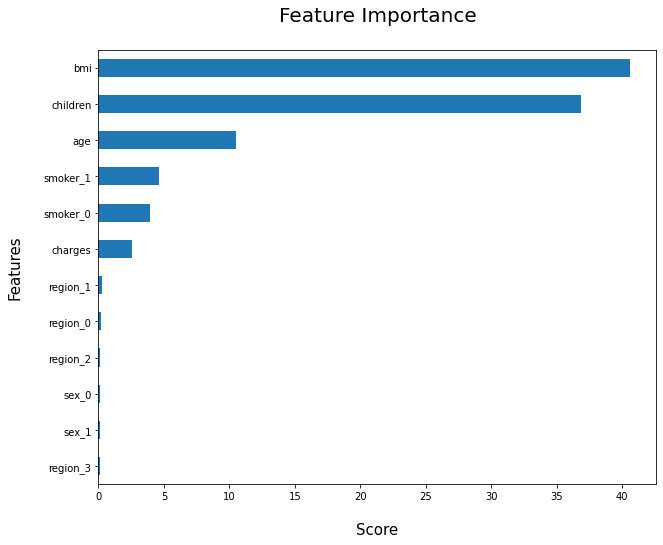

In [42]:
feat_importances = pd.Series(model_final.feature_importances_, index = X.columns)
ax = feat_importances.nlargest(13).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.title('Feature Importance\n', fontsize = 20)
plt.xlabel('\nScore', fontsize = 15)
plt.ylabel('Features\n', fontsize = 15)
plt.savefig('feature_importance.png');

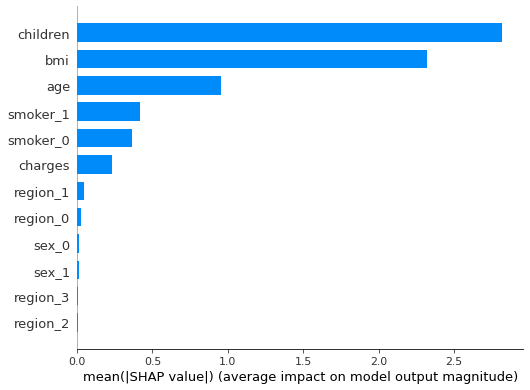

<Figure size 432x288 with 0 Axes>

In [47]:
explainer = shap.TreeExplainer(model_final)

shap_values = shap.TreeExplainer(model_final).shap_values(X_test)

shap.summary_plot(shap_values, X_train, plot_type="bar")

plt.savefig('shap_bar.png');

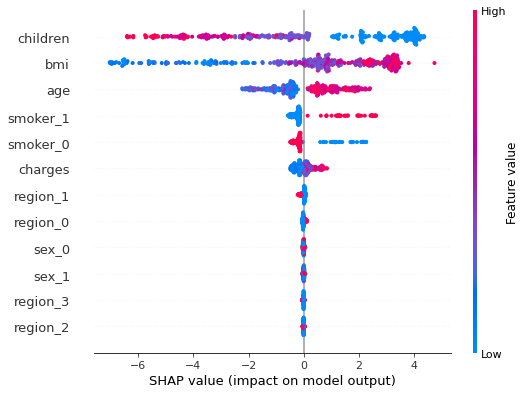

<Figure size 432x288 with 0 Axes>

In [48]:
plt.figure(figsize = (10,10))

shap.summary_plot(shap_values, X_test)

plt.savefig('shap.png');